In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_differences_df(spectra_df, background_sample, start_idx=2, stop_idx=-9):
    # Convert DataFrames to PyTorch tensors
    spectra = spectra_df.iloc[:,start_idx:stop_idx]
    tensor1 = torch.tensor(spectra.values, dtype=torch.float32)
    tensor2 = torch.tensor(background_sample.values, dtype=torch.float32)

    # Move tensors to GPU if available
    if torch.cuda.is_available():
        tensor1 = tensor1.cuda()
        tensor2 = tensor2.cuda()

    differences = tensor1.unsqueeze(1) - tensor2.unsqueeze(0)

    differences_np = differences.cpu().numpy()  # move differences to cpu

    # Reshape the differences to 2D for DataFrame creation
    m, p, n = differences_np.shape
    differences_reshaped = differences_np.reshape(m * p, n)

    # Create a DataFrame from the reshaped array
    differences_df = pd.DataFrame(differences_reshaped)
    # round to two decimal places
    differences_df = differences_df.astype(float).round(2)

    index_col = np.repeat(spectra_df['index'].values, p)
    differences_df.insert(0, 'index', index_col)
    label_info = pd.DataFrame(np.repeat(spectra_df.iloc[:,stop_idx:].values, p, axis=0))
    differences_df = pd.concat([differences_df, label_info], axis=1)
    
    differences_df.columns = spectra_df.columns[start_idx-1:]

    return differences_df

: 

In [ ]:
def plot_ims_spectrum(
        spectrum, chem_label, real_or_synthetic, 
        preprocessing_type='Spectrum', save_plot_path=None,
        rip_start_col=None, rip_stop_col=None
        ):
    # x axis should run from lowest drift time (184) to highest drift time (184 + len(spectrum)//2)
    numbers = range(184, (len(spectrum)//2)+184)

    plt.plot(numbers, spectrum[:len(numbers)], label='Positive')
    if rip_start_col is not None:
        plt.axvline(x=rip_start_col, color='red', linestyle='--')
        plt.axvline(x=rip_stop_col, color='red', linestyle='--')

    plt.plot(numbers, spectrum[len(numbers):], label='Negative')
    plt.title(f'{real_or_synthetic} {chem_label} {preprocessing_type}', fontsize=20)
    plt.xlabel('Drift Time', fontsize=16)
    plt.ylabel('Ion Intensity', fontsize=16)
    plt.legend(fontsize=14)

    if save_plot_path is not None:
        plt.savefig(save_plot_path, format='png', dpi=300)
    plt.show()

: 

In [10]:
thing.head()

,Unnamed: 0,index,p_184,p_185,p_186,p_187,p_188,p_189,p_190,p_191,...,n_1021,Label,DEB,DEM,DMMP,DPM,DtBP,JP8,MES,TEPO
0,235588,1212924,105.0,109.0,115.0,120.0,124.0,130.0,135.0,140.0,...,-5.0,TEPO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,347714,1473778,100.0,104.0,106.0,109.0,113.0,116.0,120.0,124.0,...,1.0,DMMP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,80398,481652,93.0,97.0,100.0,104.0,106.0,108.0,111.0,114.0,...,-18.0,DEM,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,72423,443123,90.0,94.0,98.0,101.0,104.0,108.0,109.0,113.0,...,-26.0,MES,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,207213,1123019,75.0,80.0,85.0,89.0,92.0,95.0,98.0,100.0,...,9.0,TEPO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
spectra = pd.read_feather('../../scratch/val_data.feather')
bkg = pd.read_feather('../../scratch/val_bkg.feather')
avg_bkg = pd.read_csv('../../scratch/val_avg_bkg.csv')

: 

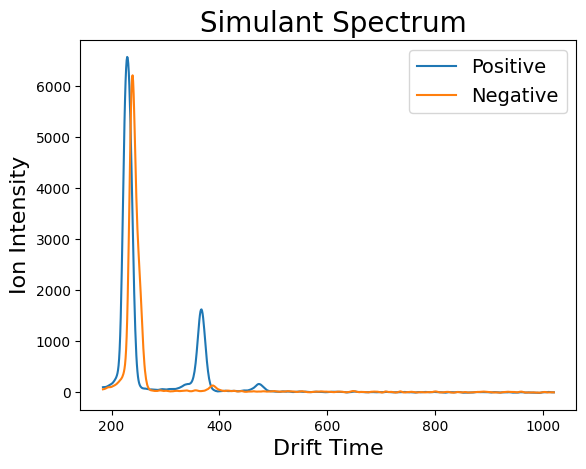

: 

In [ ]:
plot_ims_spectrum(spectra.iloc[0,2:-9], 'Simulant', '', 'Spectrum')

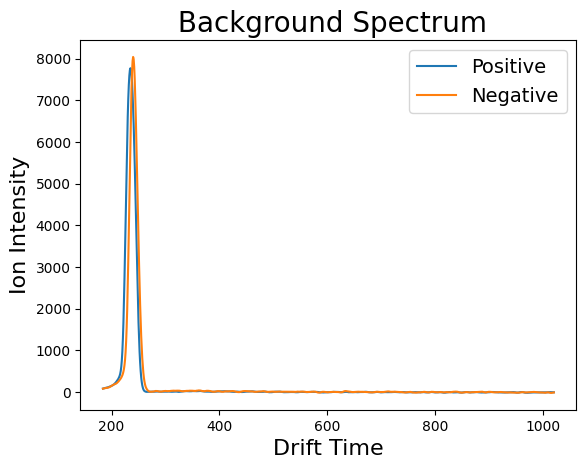

: 

In [ ]:
plot_ims_spectrum(bkg.iloc[0,2:-1], 'Background', '', 'Spectrum')

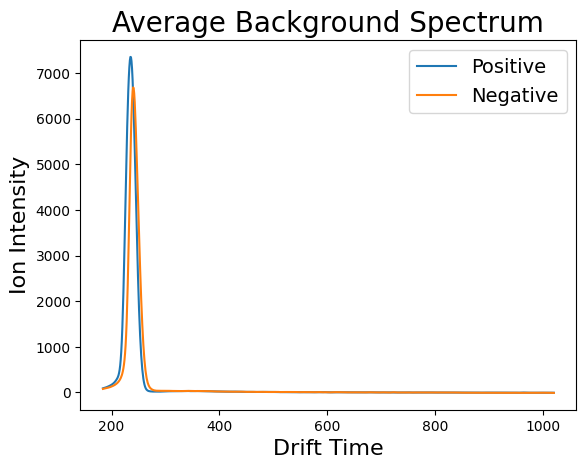

: 

In [ ]:
plot_ims_spectrum(avg_bkg.iloc[0,1:], 'Background', 'Average', 'Spectrum')

In [ ]:
sample = spectra.iloc[:10,:]
diffs = generate_differences_df(sample, avg_bkg.iloc[0,1:], start_idx=2, stop_idx=-9)

: 

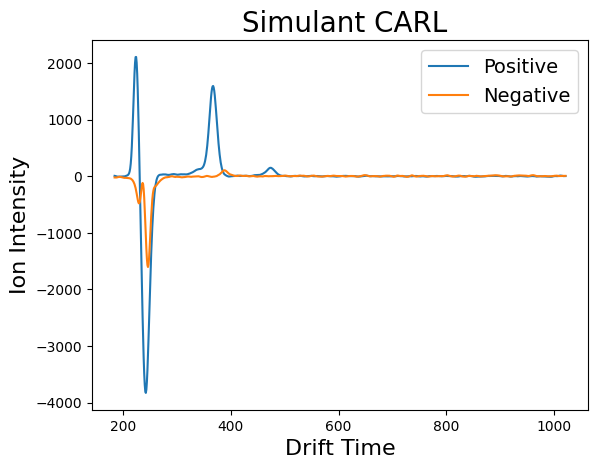

: 

In [ ]:
plot_ims_spectrum(diffs.iloc[0,1:-9], 'Simulant', '', 'CARL')